In [1]:
import numpy as np
import pandas as pd

Pandas — программная библиотека на языке Python для обработки и анализа данных. Работа pandas с данными строится поверх библиотеки NumPy.

Мы сейчас рассмотрим следующее: 
    - посмотрим два объекта из библиотеки pandas: Series и DataFrame.
    - пощупаем что это вообще такое.

Series - объект похожий на list в питоне, он упорядочен и туда можно положить что угодно)
Однако на деле объект Series больше похож на упорядоченный словарь OrderedDict, 
тк у Series помимо значений есть еще и индексы.

In [9]:
a = pd.Series(data=['влад', 'миша', 'илья', 'зарина', 'антон'])

In [10]:
a

0      влад
1      миша
2      илья
3    зарина
4     антон
dtype: object

In [11]:
# мы можем создавать серии со своей индексацией
a = pd.Series(data=['амир', 'миша', 'илья', 'зарина', 'игорь'], 
              index=[101,102,103,104,105])

In [12]:
# и обращаться по индексу
a[103]

'илья'

In [13]:
# внутри все хранится в виде np.array
a.values

array(['амир', 'миша', 'илья', 'зарина', 'игорь'], dtype=object)

In [14]:
a.index

Int64Index([101, 102, 103, 104, 105], dtype='int64')

In [15]:
# мы можем создать Series вот так:

a = pd.Series({'a': 1, 'b': 2, 'c': 3, 'd': 4})

In [16]:
a

a    1
b    2
c    3
d    4
dtype: int64

In [17]:
# мы можем на лету поменять индекс

a.index=[1,2,3,4]

In [18]:
a

1    1
2    2
3    3
4    4
dtype: int64

In [19]:
# у Series есть поле name

a.name='fofoofof'

In [20]:
a

1    1
2    2
3    3
4    4
Name: fofoofof, dtype: int64

In [21]:
a.mean()

2.5

In [22]:
a.median()

2.5

In [23]:
a.quantile(q=0.7)

3.0999999999999996

In [24]:
np.sqrt(a)

1    1.000000
2    1.414214
3    1.732051
4    2.000000
Name: fofoofof, dtype: float64

In [25]:
a ** 2

1     1
2     4
3     9
4    16
Name: fofoofof, dtype: int64

___________

DataFrame в простом случае это таблица. 
у нее есть строки и столбцы.
столбцами в DataFrame являются объекты Series.
у DataFrame есть индекс по строкам, который по умолчанию задается в числовом диапазоне начниая с 0.
Индексом по столбцам является название колонок.

In [26]:
d = {'колонка_1': [1, 2, 3, 4, 5], 'колонка_2': ['амир', 'миша', 'илья', 'зарина', 'игорь']}
df = pd.DataFrame(data=d)

In [27]:
df

,колонка_1,колонка_2
0,1,амир
1,2,миша
2,3,илья
3,4,зарина
4,5,игорь


In [28]:
df = pd.DataFrame({
    'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
    'population': [17.04, 143.5, 9.5, 45.5],
    'square': [2724902, 17125191, 207600, 603628]
}, index=['KZ', 'RU', 'BY', 'UA'])

In [29]:
df

,country,population,square
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


![](https://pbpython.com/images/pandas-dataframe-shadow.png)

In [35]:
# пандас умеет загружать данные из разных источников.
# TODO загрузите данные из tsv файла
titanik_csv = pd.read_csv('titanik.tsv', sep='|', index_col=0)

##### 1. посмотреть как выглядят данные

In [37]:
# вывести первые n элементов (по умолчанию n=5)
titanik_csv.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Обратите внимание в некоторых столбцах там где встречаются цифры еще иногда встречаются значния NaN. 
По умолчанию pandas так записывает пропущенные значения (то есть в tsv файле там ничего не было) - 
это нормальная ситуация для анализа данных (где то просто не получилось найти данные)

In [38]:
# TODO вывести 10 последних элементов (по умолчанию 5)
titanik_csv.tail(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [39]:
# TODO вывести 10 случайных элементов (по умолчанию 5)
titanik_csv.sample(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
594,2,0,"Wheadon, Mr. Edward H",male,66.0000,0,0,C.A. 24579,10.5000,NaN,S,NaN,NaN,"Guernsey, England / Edgewood, RI"
590,2,1,"West, Miss. Barbara J",female,0.9167,1,2,C.A. 34651,27.7500,NaN,S,10,NaN,"Bournmouth, England"
1247,3,1,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,NaN,1,0,376564,16.1000,NaN,S,10,NaN,NaN
974,3,0,"Lobb, Mr. William Arthur",male,30.0000,1,0,A/5. 3336,16.1000,NaN,S,NaN,NaN,NaN
338,2,0,"Beauchamp, Mr. Henry James",male,28.0000,0,0,244358,26.0000,NaN,S,NaN,NaN,England
789,3,0,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C,NaN,NaN,NaN
508,2,0,"Moraweck, Dr. Ernest",male,54.0000,0,0,29011,14.0000,NaN,S,NaN,NaN,"Frankfort, KY"
572,2,1,"Trout, Mrs. William H (Jessie L)",female,28.0000,0,0,240929,12.6500,NaN,S,NaN,NaN,"Columbus, OH"
139,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0000,0,1,PC 17582,153.4625,C125,S,3,NaN,"Greenwich, CT"
1013,3,0,"Meanwell, Miss. (Marion Ogden)",female,NaN,0,0,SOTON/O.Q. 392087,8.0500,NaN,S,NaN,NaN,NaN


In [40]:
# тк pandas сделан на основе numpy, то мы можем так же стандартно посмотреть размерность таблички через
# свойство shape

titanik_csv.shape

(1309, 14)

##### 2. начнем смотреть столбцы ближе.

Для того чтобы понять какой столбец (признак) что означает почитайте об этом в разделе Data
https://www.kaggle.com/c/titanic/data . 

Пока вы не запомните, может быть полезно выписать название всех столбцов и что они значат прямо в нотбук - сюда:

* Survived - 
* Pclass - 
* Name - 
* Sex - 
* Age - 
* SibSp - 
* Parch - 
* Ticket - 
* Fare - 
* Cabin - 
* Embarked -

несколько полезных методов которые помогут быстро посмотреть общие характеристики данных:

1. .describe() - Выведет количество, среднее, стандартное отклонение, квантили, минимум и максимум всех **числовых признаков** (столбцов)
2. .columns - это поле а не метод (в конце скобки не надо писать). Выведет название всех колонок.
3. .count() - выведет количесто **не пропущенных** значений в каждом столбце (not nan значений)
4. .nunique() - выведет количество уникальных значений в каждом столбце
5. .dtypes - это поле а не метод (в конце скобки не надо писать). Выведет тип переменной хранящейся в каждом столбце


In [41]:
titanik_csv.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [42]:
titanik_csv.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [43]:
titanik_csv.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

In [44]:
# там где строки пандас по умолчанию пишет object
# иногда полезно посмотреть что тут.

titanik_csv.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [50]:
#ToDO посмотреть null values и типы колонок
titanik_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 153.4+ KB


мы можем напрямую обращаться к столбцу, столбцам, строке и строкам.

https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [51]:
# самый простой способ обратиться к столбцу - это написать его название через точку
# давайте обратимся к полю sex
# нам вернется pd.Series - прямо вся колонка

titanik_csv.sex

0       female
1         male
2       female
3         male
4       female
5         male
6       female
7         male
8       female
9         male
10        male
11      female
12      female
13      female
14        male
15        male
16        male
17      female
18      female
19        male
20        male
21      female
22        male
23      female
24      female
25        male
26        male
27      female
28      female
29        male
         ...  
1279    female
1280      male
1281      male
1282      male
1283      male
1284      male
1285      male
1286    female
1287      male
1288      male
1289      male
1290    female
1291      male
1292      male
1293      male
1294      male
1295      male
1296      male
1297      male
1298      male
1299      male
1300    female
1301      male
1302      male
1303      male
1304    female
1305    female
1306      male
1307      male
1308      male
Name: sex, Length: 1309, dtype: object

In [52]:
# еще можно обратиться через квадратные скобки
# эффект будет совершенно таким же

titanik_csv["sex"]

0       female
1         male
2       female
3         male
4       female
5         male
6       female
7         male
8       female
9         male
10        male
11      female
12      female
13      female
14        male
15        male
16        male
17      female
18      female
19        male
20        male
21      female
22        male
23      female
24      female
25        male
26        male
27      female
28      female
29        male
         ...  
1279    female
1280      male
1281      male
1282      male
1283      male
1284      male
1285      male
1286    female
1287      male
1288      male
1289      male
1290    female
1291      male
1292      male
1293      male
1294      male
1295      male
1296      male
1297      male
1298      male
1299      male
1300    female
1301      male
1302      male
1303      male
1304    female
1305    female
1306      male
1307      male
1308      male
Name: sex, Length: 1309, dtype: object

In [53]:
# через values мы можем получить np.array который хранится в вернувшемся объекте pd.Series

titanik_csv.sex.values

array(['female', 'male', 'female', ..., 'male', 'male', 'male'],
      dtype=object)

In [56]:
# силами pandas мы можем посмотреть различные значения содержащиеся в объекте pd.Series
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
# обратите внимание на доп параметры этой функции

titanik_csv.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

> Вопрос Кого больше мужчин или женщин?

> ответ: Male

> Вопрос - объект какого типа возвращается после вызова  функции value_counts() ?

> ответ: Series


в пандасе мы можем получить срез сразу по нескольким колонкам, тогда вернется новый DataFrame а не Series

In [57]:
titanik_csv[ ['sex', 'age'] ]

,sex,age
0,female,29.0000
1,male,0.9167
2,female,2.0000
3,male,30.0000
4,female,25.0000
5,male,48.0000
6,female,63.0000
7,male,39.0000
8,female,53.0000
9,male,71.0000


Самый каноничный способ обращения к полям - через loc или iloc

loc - позволяет обратиться по названию индексов, 

iloc - по нумерованному значению (то есть обращаемся через цифры, начиная с нуля)

In [58]:
titanik_csv.loc[:, 'sex']

0       female
1         male
2       female
3         male
4       female
5         male
6       female
7         male
8       female
9         male
10        male
11      female
12      female
13      female
14        male
15        male
16        male
17      female
18      female
19        male
20        male
21      female
22        male
23      female
24      female
25        male
26        male
27      female
28      female
29        male
         ...  
1279    female
1280      male
1281      male
1282      male
1283      male
1284      male
1285      male
1286    female
1287      male
1288      male
1289      male
1290    female
1291      male
1292      male
1293      male
1294      male
1295      male
1296      male
1297      male
1298      male
1299      male
1300    female
1301      male
1302      male
1303      male
1304    female
1305    female
1306      male
1307      male
1308      male
Name: sex, Length: 1309, dtype: object

чтобы в дальнейшем экономить место - будем смотреть только первые 5 записей

In [59]:
titanik_csv.loc[:, 'sex'].head()

0    female
1      male
2    female
3      male
4    female
Name: sex, dtype: object

In [60]:
titanik_csv.loc[:, ['sex', 'age']].head()

,sex,age
0,female,29.0000
1,male,0.9167
2,female,2.0000
3,male,30.0000
4,female,25.0000


In [61]:
#TODO выведите через loc 12,13,21,21,42 строчки
titanik_csv.loc[[12, 13, 21, 21, 42], :]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France"
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,6,NaN,NaN
21,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY"
21,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY"
42,1,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.0,2,0,11769,51.4792,C101,S,D,NaN,"Belmont, MA"


In [63]:
#TODO аналогично через iloc. Есть ли разница? Почему?
titanik_csv.iloc[[12, 13, 21, 21, 42], :]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France"
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,6,NaN,NaN
21,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY"
21,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY"
42,1,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.0,2,0,11769,51.4792,C101,S,D,NaN,"Belmont, MA"


> копию или реальный объект возвращает лок?

https://stackoverflow.com/questions/47972633/in-pandas-does-iloc-method-give-a-copy-or-view

##### 3. мы можем работать с полями и изменять их как хотим.¶


In [64]:
titanik_csv.loc[0, 'name']

'Allen, Miss. Elisabeth Walton'

например, давайте выделим только первую часть имени.
как мы это делаем с одной строкой?

In [65]:
#TODO выделить только 1 часть имени пассажиров (Mrs и тд) apply :)
#TODO посчитать встречаемости каждого типа первой части имени 
titanik_csv.loc[0, 'name'].split(',')[0]

'Allen'

In [67]:
titanik_csv['name_part_1'] = titanik_csv['name'].apply(lambda x: x.split(',')[0])
titanik_csv.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,name_part_1
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison


чтобы проделать этот финт со всеми строками - не нужно итерироваться в цикле.
достаточно применить некоторую функцию.

##### 4. мы можем удалять столбцы или строки

In [69]:
titanik_csv['only_name'] = 1
titanik_csv.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,name_part_1,only_name
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1


In [70]:
titanik_csv.drop(['only_name'], axis=1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,name_part_1
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",Anderson
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",Andrews
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",Andrews
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",Appleton
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",Artagaveytia


In [71]:
titanik_csv[list(set(titanik_csv.columns)-{'only_name'})]

,fare,name,sibsp,body,pclass,home.dest,boat,parch,survived,sex,cabin,embarked,age,ticket,name_part_1
0,211.3375,"Allen, Miss. Elisabeth Walton",0,NaN,1,"St Louis, MO",2,0,1,female,B5,S,29.0000,24160,Allen
1,151.5500,"Allison, Master. Hudson Trevor",1,NaN,1,"Montreal, PQ / Chesterville, ON",11,2,1,male,C22 C26,S,0.9167,113781,Allison
2,151.5500,"Allison, Miss. Helen Loraine",1,NaN,1,"Montreal, PQ / Chesterville, ON",NaN,2,0,female,C22 C26,S,2.0000,113781,Allison
3,151.5500,"Allison, Mr. Hudson Joshua Creighton",1,135.0,1,"Montreal, PQ / Chesterville, ON",NaN,2,0,male,C22 C26,S,30.0000,113781,Allison
4,151.5500,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,NaN,1,"Montreal, PQ / Chesterville, ON",NaN,2,0,female,C22 C26,S,25.0000,113781,Allison
5,26.5500,"Anderson, Mr. Harry",0,NaN,1,"New York, NY",3,0,1,male,E12,S,48.0000,19952,Anderson
6,77.9583,"Andrews, Miss. Kornelia Theodosia",1,NaN,1,"Hudson, NY",10,0,1,female,D7,S,63.0000,13502,Andrews
7,0.0000,"Andrews, Mr. Thomas Jr",0,NaN,1,"Belfast, NI",NaN,0,0,male,A36,S,39.0000,112050,Andrews
8,51.4792,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",2,NaN,1,"Bayside, Queens, NY",D,0,1,female,C101,S,53.0000,11769,Appleton
9,49.5042,"Artagaveytia, Mr. Ramon",0,22.0,1,"Montevideo, Uruguay",NaN,0,0,male,NaN,C,71.0000,PC 17609,Artagaveytia


In [72]:
titanik_csv[['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


# 4. Группировка

![](https://image.slidesharecdn.com/slides-151008060416-lva1-app6892/95/pandas-powerful-data-analysis-tools-for-python-19-638.jpg?cb=1444284343)

In [76]:
gr = titanik_csv.groupby('sex')
gr.groups

{'female': Int64Index([   0,    2,    4,    6,    8,   11,   12,   13,   17,   18,
             ...
             1265, 1267, 1273, 1276, 1279, 1286, 1290, 1300, 1304, 1305],
            dtype='int64', length=466),
 'male': Int64Index([   1,    3,    5,    7,    9,   10,   14,   15,   16,   19,
             ...
             1296, 1297, 1298, 1299, 1301, 1302, 1303, 1306, 1307, 1308],
            dtype='int64', length=843)}

In [77]:
#TODO посчитать средний возвраст в разрезе по полу
titanik_csv.groupby('sex')['age'].mean()

sex
female    28.687071
male      30.585233
Name: age, dtype: float64

In [79]:
#TODO правда ли, что мужчины из 1 класса в среднем старше всех на корабле?
titanik_csv.groupby(['pclass', 'sex']).mean()

survived        age     sibsp     parch        fare  \
pclass sex                                                           
1      female  0.965278  37.037594  0.555556  0.472222  109.412385   
       male    0.340782  41.029250  0.340782  0.279330   69.888385   
2      female  0.886792  27.499191  0.500000  0.650943   23.234827   
       male    0.146199  30.815401  0.327485  0.192982   19.904946   
3      female  0.490741  22.185307  0.791667  0.731481   15.324250   
       male    0.152130  25.962273  0.470588  0.255578   12.415462   

                     body  only_name  
pclass sex                            
1      female         NaN        1.0  
       male    162.828571        1.0  
2      female   52.000000        1.0  
       male    171.233333        1.0  
3      female  183.000000        1.0  
       male    151.854167        1.0

In [95]:
#TODO Какой процент мужчин и женщин выжили?
titanik_csv.groupby(['sex'])['survived'].mean()

sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

##### Слияние двух датафреймов

In [96]:
a = titanik_csv.groupby(['sex', 'pclass']).age.mean().reset_index()
b = titanik_csv.groupby(['pclass']).fare.mean().reset_index()

In [97]:
a

,sex,pclass,age
0,female,1,37.037594
1,female,2,27.499191
2,female,3,22.185307
3,male,1,41.029250
4,male,2,30.815401
5,male,3,25.962273


In [98]:
b

,pclass,fare
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [99]:
pd.merge(a, b, on='pclass')

,sex,pclass,age,fare
0,female,1,37.037594,87.508992
1,male,1,41.029250,87.508992
2,female,2,27.499191,21.179196
3,male,2,30.815401,21.179196
4,female,3,22.185307,13.302889
5,male,3,25.962273,13.302889


In [100]:
c = pd.merge(a, b, on='pclass')

In [101]:
## как удалить из c колонку age ? 
c.drop(['age'], axis=1, inplace=True)

In [102]:
c

,sex,pclass,fare
0,female,1,87.508992
1,male,1,87.508992
2,female,2,21.179196
3,male,2,21.179196
4,female,3,13.302889
5,male,3,13.302889


In [103]:
## как удалить из c строчки с индексами 2 и 4 ? 
c.drop([2, 4], inplace=True)

In [104]:
c

,sex,pclass,fare
0,female,1,87.508992
1,male,1,87.508992
3,male,2,21.179196
5,male,3,13.302889


##### Таблица сопряженности

Давайте построим **таблицу сопряженности** (Она же **cross tabulation** или **contigency table** она же **pivot table**). 

https://en.wikipedia.org/wiki/Contingency_table

Pandas позволяет сложные таблицы сопряженности со многими уровнями вложенности с использованием функции pandas .crosstab()

Нам потребуются 2 параметра этой функции:

1. index - список колонок которые будут расположены по вертикали (список может состоять из 1 элемента)
2. columns - список колонок которые будут расположены по горизонтали (список может состоять из 1 элемента)
Опционально (использовать отдельно друго от друга)
3. margins - значение True будет показывать сумму по столбцам и строкам
4. normalize - новый параметр позволят отнормировать значения на сумму по строке ('rows'), столбцу ('columns'), или на ту и другую ('all')

Обратите внимание что crosstab() это функция библиотеки Pandas, а не метод 
объекта pandas.DataFrame. 

Может быть не очень понятно как ее использовать, если не сможете разобраться, ответ можно найти тут  https://www.kaggle.com/dejavu23/titanic-eda-to-ml-beginner .
**Но сначала попробуйте погуглить.**

Документация на .crosstab()
http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

In [114]:
# TODO воспользуйтесь функцией crosstab() и построите таблицу сопряженности
# для колнок Sex (по вертикали) и Survived (по горизонтали)

pd.crosstab(index=titanik_csv['sex'], columns=titanik_csv['survived'], margins=True)

survived,0,1,All
sex,,,
female,127,339,466
male,682,161,843
All,809,500,1309


In [120]:
# воспользуйтесь функцией crosstab() и построите таблицу сопряженности 
# для колнок Sex и Survived (по вертикали) и Pclass (по горизонтали)
# установите параметр margins=True

pd.crosstab(index=[titanik_csv['survived'], titanik_csv['sex']], columns=titanik_csv['pclass'], margins=True)

pclass             1    2    3   All
survived sex                        
0        female    5   12  110   127
         male    118  146  418   682
1        female  139   94  106   339
         male     61   25   75   161
All              323  277  709  1309

#### Вопрос: 
Что вы можете сказать выживаемости пассижиров разного класса и пола?

.crosstab() позволяет не только считать количество внутри категорий,
у него есть специальный параметр:
1. values - можно передать сюда столбец для которого будет посчитана aggfunc внутри сложной категории задаваемой вашей таблице

In [122]:
# Построим предыдующую таблицу
# но теперь воспользуемся параметрами values (titanic['age']) и aggfunc ('mean')

pd.crosstab(index=[titanik_csv.survived, titanik_csv['sex']],
            columns=[titanik_csv.pclass],
            values=titanik_csv['age'],
            aggfunc='mean',
            margins=True)

pclass                   1          2          3        All
survived sex                                               
0        female  35.200000  34.090909  23.418750  25.255208
         male    43.658163  33.092593  26.679598  31.516412
1        female  37.109375  26.711051  20.814815  29.815354
         male    36.168240  17.449274  22.436441  26.977778
All              39.159918  29.506705  24.816367  29.881135

In [123]:
pd.crosstab(titanik_csv.survived,
            titanik_csv.pclass)

pclass,1,2,3
survived,,,
0,123,158,528
1,200,119,181


In [124]:
pd.pivot_table(titanik_csv, values='sex', index='survived', columns='pclass', aggfunc='count')

pclass,1,2,3
survived,,,
0,123,158,528
1,200,119,181


# Визуализация

кто любит поинтереснее - Seaborn for the Titanic 
https://gist.github.com/mwaskom/8224591

In [125]:
import matplotlib.pyplot as plt

%matplotlib inline

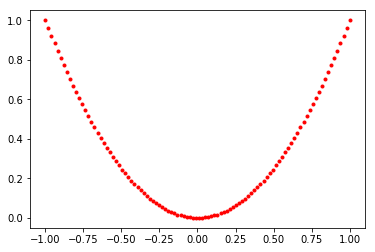

In [133]:
x = np.linspace(-1, 1, 100) # разбивает отрезок от -1 до 1 на 100 точек с примерно одинаковым шагом

plt.plot(x, x**2, '.r')

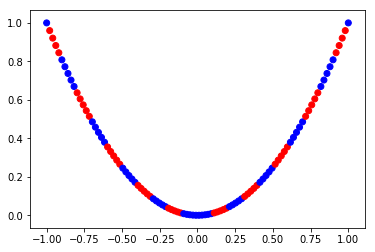

In [136]:
plt.scatter(x, x**2, c=['r' if int(i * 10) % 2 == 1 else 'b' for i in x])

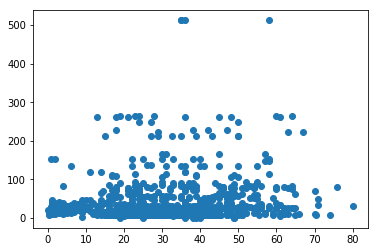

In [137]:
plt.scatter(titanik_csv['age'], titanik_csv['fare'])

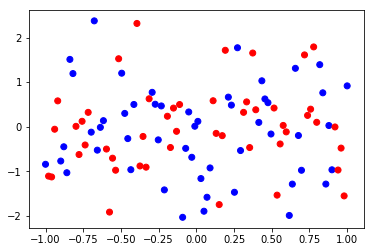

In [138]:
plt.scatter(x, np.random.randn(100), c=['r' if int(i * 10) % 2 == 1 else 'b' for i in x])

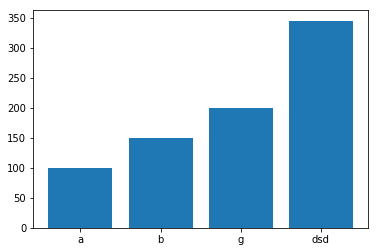

In [139]:
idx = [1,2,3,4]
vals = [100, 150, 200, 345]

plt.bar(idx, vals, tick_label=['a', 'b', 'g', 'dsd']);

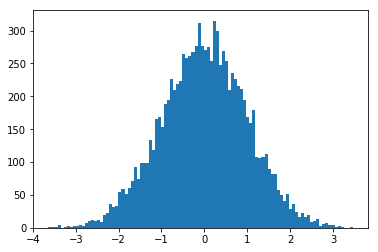

In [140]:
plt.hist(np.random.randn(10000), bins=100);

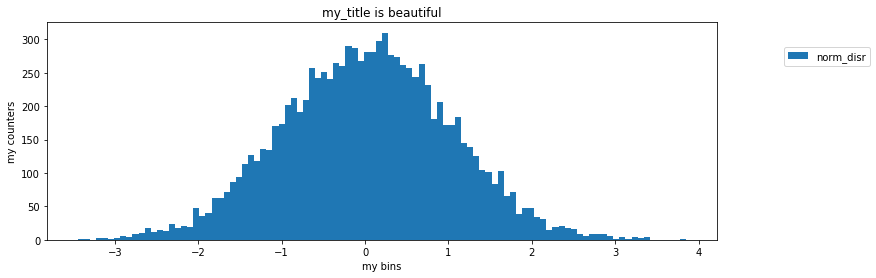

In [141]:
plt.figure(figsize=(12, 4))

plt.hist(np.random.randn(10000), bins=100, label='norm_disr')

plt.legend(loc=[1.1, 0.8]) # try loc='best'

plt.title('my_title is beautiful');

# plt.xlim([-3, 3])
# plt.ylim([-100, 400])

plt.xlabel('my bins');
plt.ylabel('my counters');

# plt.xticks(np.arange(-3, 4, 1), list('abcdefg'))
# plt.yticks()

# plt.savefig('./path.png', dpi=300)

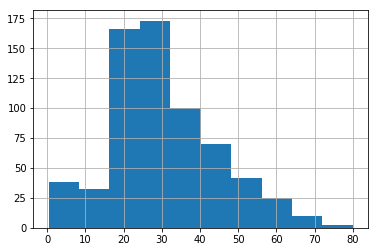

In [145]:
titanik_csv[titanik_csv['sex'] == 'male']['age'].hist();

In [162]:
titanik_csv['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (3,) and requested shape (1309,)

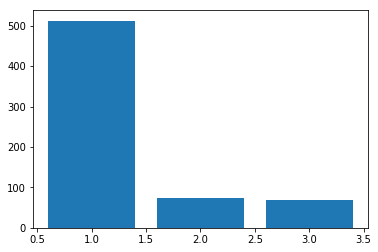

In [164]:
plt.bar(titanik_csv['pclass'], titanik_csv['fare'], tick_label=[1, 2, 3])

In [ ]:
## TODO нарисуем несколько графиков на одном - квадратичную и кубическую зависимость
## Подпишем графики и выведем легенду чтобы было понятно какой график - какой.

x = np.linspace(-1, 1, 100)

plt. ...

In [147]:
import seaborn as sns

In [ ]:
# зависимость всего от всего
sns.pairplot(titanik_csv)

##### Несколько графиков рядом

In [ ]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# subplot - сетка с высотой 2 и шириной 1, по дефолту сделать первый subplot активным
plt.subplot(2, 1, 1)

# построим что нибудь на первом
plt.plot(x, y_sin)
plt.title('Sine')

# Поменяем сабплот - теперь активен второй
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# отрисовать
plt.show()

# Посмотрим на титанике

In [ ]:
import pandas as pd

In [ ]:
titanic =  pd.read_csv('titanik.tsv', sep='|', index_col=0)

In [ ]:
titanic["pclass"].value_counts()

Отрисуем pclass

In [ ]:
plt.bar( titanic["pclass"].value_counts().index, 
         titanic["pclass"].value_counts().values,
         tick_label=titanic["pclass"].value_counts().index);

посмотрим на число погибших людей в каждом из pclass

In [ ]:
titanic.loc[titanic.survived==0, "pclass"].value_counts()

In [ ]:
pd.crosstab(titanic.survived, titanic.pclass)

In [ ]:
died = pd.crosstab(titanic.survived, titanic.pclass).loc[0]
plt.bar(died.index, died.values);

Попробуем в зависимости от пола

In [ ]:
male = titanic.sex=='male'

survived = pd.crosstab(titanic[male].survived, 
                       titanic[male].pclass
                      ).loc[1]
plt.bar(survived.index, survived.values, alpha=0.4, label='male');


survived = pd.crosstab(titanic[~male].survived, 
                       titanic[~male].pclass
                      ).loc[1]
plt.bar(survived.index, survived.values, alpha=0.4, label='female');

In [ ]:
titanic.sex.value_counts()

In [ ]:
titanic[titanic.survived==1].sex.value_counts()

In [ ]:
male_age = titanic[titanic.sex=='male'].age.dropna()
female_age = titanic[titanic.sex!='male'].age.dropna()

bins = plt.hist(female_age, color='orange', alpha=0.5, label='female')
bins = plt.hist(male_age, bins=bins[1], color='blue', alpha=0.5, label='male')
plt.legend(loc='best')

plt.title('распределение возрастов мужчин и женщин');

In [ ]:
male_age = titanic[(titanic.sex=='male').values * (titanic.survived==1).values].age.dropna()
female_age = titanic[(titanic.sex=='female').values * (titanic.survived==1).values].age.dropna()

bins = plt.hist(female_age, color='orange', alpha=0.5, label='female')
bins = plt.hist(male_age, bins=bins[1], color='blue', alpha=0.5, label='male')
plt.legend(loc='best')

plt.title('распределение возрастов мужчин и женщин среди выживших');

In [ ]:
plt.scatter(titanic.age, titanic.fare, c=titanic.sex.apply(lambda x: 'r' if x=='female' else 'b'))

In [ ]:
maps = {1:'r', 2:'b', 3:'y'}
plt.scatter(titanic[titanic.pclass==1].age, titanic[titanic.pclass==1].fare, c='r', label='first_class')
plt.scatter(titanic[titanic.pclass==2].age, titanic[titanic.pclass==2].fare, c='b', label='second_class')
plt.scatter(titanic[titanic.pclass==3].age, titanic[titanic.pclass==3].fare, c='y', label='third_class')

plt.xlabel('age')
plt.ylabel('fare')

plt.legend()

> все достаточно логично, однако если бы данные не были такими очевидными?

In [ ]:
plt.scatter(titanic.index, titanic.fare)

In [ ]:
#TODO попробуем pairplot из seaborn

https://khashtamov.com/ru/pandas-introduction/

https://seaborn.pydata.org/tutorial.html